# Google Drive Mount
I employ Detectron2 in Google Colab. If you have configured the Detectron2 environment in your own computer, just ignore this google drive mount code.  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Install detectron2

In [3]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.14)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-3atdt6c7
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-3atdt6c7
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-3uvjnqsn
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-3uvjnqsn
     |████████████████████████████████| 266kB 9.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=50354 sha256=f838cf1df9be2bd38fb2fca1bdaae8a5a6df20dd38e8a6b2bca079ea0482c3bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-b6hj86ts/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel f

'1.3.1'

In [4]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo 
# When the installation of detectron2_repo is done, the runtime should be restarted so that the lib can be imported.

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1642 (delta 7), reused 16 (delta 5), pack-reused 1610
Receiving objects: 100% (1642/1642), 1.70 MiB | 3.06 MiB/s, done.
Resolving deltas: 100% (1001/1001), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

print("import successful!")

import successful!


# Use dump mode in Apply_Net.py to extract result.pkl 

[12/05 01:58:31 apply_net]: Loading config from /content/detectron2_repo/projects/DensePose/configs/densepose_rcnn_R_101_FPN_s1x.yaml
Config '/content/detectron2_repo/projects/DensePose/configs/densepose_rcnn_R_101_FPN_s1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[12/05 01:58:31 apply_net]: Loading model from /content/drive/My Drive/DensePose_ResNet101_FPN_s1x-e2e2.pkl
[12/05 01:58:42 apply_net]: Loading data from /content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg
[12/05 01:58:43 apply_net]: Processing /content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg
[12/05 01:58:43 apply_net]: Output saved to result.pkl
(805, 299, 3)


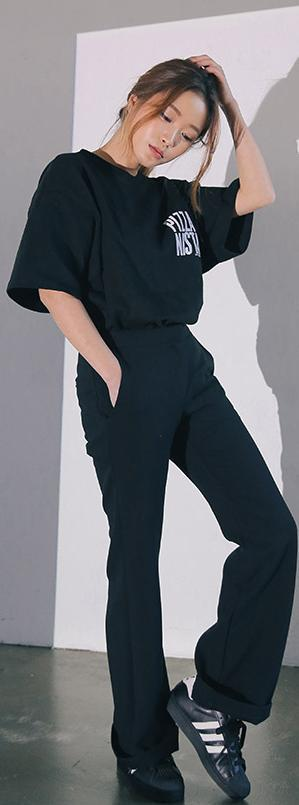

In [2]:
!python /content/detectron2_repo/projects/DensePose/apply_net.py dump /content/detectron2_repo/projects/DensePose/configs/densepose_rcnn_R_101_FPN_s1x.yaml "/content/drive/My Drive/DensePose_ResNet101_FPN_s1x-e2e2.pkl" "/content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg" --output result.pkl -v
im = cv2.imread("/content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg")
print(im.shape)
cv2_imshow(im)

# Convert Result.pkl to IUV and INDS arrays

data: [{'file_name': '/content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg', 'scores': tensor([0.9998, 0.3506, 0.0555]), 'pred_boxes_XYXY': tensor([[ 18.1704,  52.0800, 286.3601, 802.5349],
        [ 75.8927, 311.0467, 299.0000, 800.8822],
        [ 20.3298,  52.0273, 270.0966, 445.8955]]), 'pred_densepose': <densepose.structures.DensePoseResult object at 0x7fae91532048>}]
iuv arr shape: (3, 750, 268)
bbox_xywh: [18.17038345336914, 52.08000946044922, 268.1897277832031, 750.454833984375]
img shape: (805, 299, 3)
x y w h: 18 52 268 750
iuv_arr shape: (3, 750, 268)
crop img shape: (750, 268, 3)
INDS shape: (750, 268)


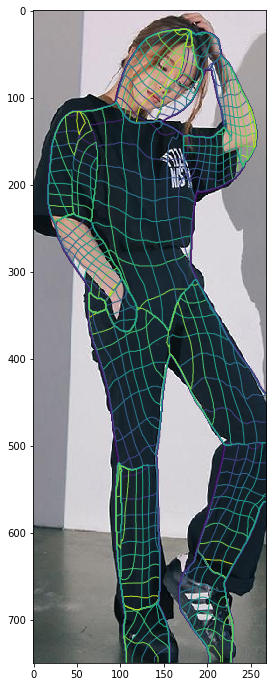

In [8]:
import argparse
import glob
import logging
import os
import pickle
import sys
from typing import Any, ClassVar, Dict, List
import torch

sys.path.append("/content/detectron2_repo/projects/DensePose/") #When importing the densepose lib below, errors occur so I add this code

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.engine.defaults import DefaultPredictor
from detectron2.structures.boxes import BoxMode
from detectron2.structures.instances import Instances
from detectron2.utils.logger import setup_logger

from densepose.structures import DensePoseDataRelative, DensePoseOutput, DensePoseResult
from densepose import add_densepose_config
from densepose.utils.logger import verbosity_to_level
from densepose.vis.base import CompoundVisualizer
from densepose.vis.bounding_box import ScoredBoundingBoxVisualizer
from densepose.vis.densepose import (
    DensePoseResultsContourVisualizer,
    DensePoseResultsFineSegmentationVisualizer,
    DensePoseResultsUVisualizer,
    DensePoseResultsVVisualizer,
)
from densepose.vis.extractor import CompoundExtractor, create_extractor

f = open('/content/result.pkl', 'rb') #change the pkl path to your own path
data = pickle.load(f)
print('data:', data)

densepose_result = data[0]['pred_densepose']
# we can get three iuv_arrays from densepose_result.results, here we use the firt array which has the highest detection score as the iuv array. 
for i, result_encoded_w_shape in enumerate(densepose_result.results):
  if i != 0:
    continue
  iuv_arr = DensePoseResult.decode_png_data(*result_encoded_w_shape)
  bbox_xywh = densepose_result.boxes_xywh[i]
# print('iuv arr:', iuv_arr)
print('iuv arr shape:', iuv_arr.shape) #IUV_array is obtained
print('bbox_xywh:', bbox_xywh)

%matplotlib inline

import matplotlib.pyplot as plt

im = cv2.imread("/content/drive/My Drive/Lookbook/PID008722_CLEAN0_IID077498.jpg")
print('img shape:', im.shape)

x, y, w, h = int(bbox_xywh[0]), int(bbox_xywh[1]), int(bbox_xywh[2]), int(bbox_xywh[3])
print('x y w h:', x, y, w, h)

# the iuv_array is the iuv values of cropped image from the original image, so we have to use cropped image for further operation. 
print('iuv_arr shape:', iuv_arr.shape)

crop_img = im[y:y+h, x:x+w]
print('crop img shape:', crop_img.shape)


fig = plt.figure(figsize=[12,12])
plt.imshow( crop_img[:,:,::-1] )
plt.contour( iuv_arr[1,:,:]/256.,10, linewidths = 1 )
plt.contour( iuv_arr[2,:,:]/256.,10, linewidths = 1 )

INDS = iuv_arr[0,:,:] #INDS_array is obtained
print('INDS shape:', INDS.shape)

# IUV to PointOnSurface
I transfer the **densepose_methods.py** code from **detectron1-densepose** to **detectron2-densepose**, and reaccomplish the task of IUV to PointOnSurface. 

In [12]:
# the code is transferred from detectron1-densepose, the paths of UV_Processed.mat and UV_symmetry_transforms.mat should be modified to your own paths. 
import numpy as np
import copy
import cv2
from scipy.io  import loadmat
import scipy.spatial.distance
import os 


class DensePoseMethods:
    def __init__(self):
        #
        ALP_UV = loadmat( '/content/drive/My Drive/UV_Processed.mat'  ) # Use your own path
        self.FaceIndices = np.array( ALP_UV['All_FaceIndices']).squeeze()
        self.FacesDensePose = ALP_UV['All_Faces']-1
        self.U_norm = ALP_UV['All_U_norm'].squeeze()
        self.V_norm = ALP_UV['All_V_norm'].squeeze()
        self.All_vertices =  ALP_UV['All_vertices'][0]
        ## Info to compute symmetries.
        self.SemanticMaskSymmetries = [0,1,3,2,5,4,7,6,9,8,11,10,13,12,14]
        self.Index_Symmetry_List = [1,2,4,3,6,5,8,7,10,9,12,11,14,13,16,15,18,17,20,19,22,21,24,23];
        UV_symmetry_filename = '/content/drive/My Drive/UV_symmetry_transforms.mat'   # Use your own path 
        self.UV_symmetry_transformations = loadmat( UV_symmetry_filename )
    

    def get_symmetric_densepose(self,I,U,V,x,y,Mask):
        ### This is a function to get the mirror symmetric UV labels.
        Labels_sym= np.zeros(I.shape)
        U_sym= np.zeros(U.shape)
        V_sym= np.zeros(V.shape)
        ###
        for i in ( range(24)):
            if i+1 in I:
                Labels_sym[I == (i+1)] = self.Index_Symmetry_List[i]
                jj = np.where(I == (i+1))
                ###
                U_loc = (U[jj]*255).astype(np.int64)
                V_loc = (V[jj]*255).astype(np.int64)
                ###
                V_sym[jj] = self.UV_symmetry_transformations['V_transforms'][0,i][V_loc,U_loc]
                U_sym[jj] = self.UV_symmetry_transformations['U_transforms'][0,i][V_loc,U_loc]
        ##
        Mask_flip = np.fliplr(Mask)
        Mask_flipped = np.zeros(Mask.shape)
        #
        for i in ( range(14)):
            Mask_flipped[Mask_flip == (i+1)] = self.SemanticMaskSymmetries[i+1]
        #
        [y_max , x_max ] = Mask_flip.shape
        y_sym = y
        x_sym = x_max-x
        #
        return Labels_sym , U_sym , V_sym , x_sym , y_sym , Mask_flipped
    
    
    
    def barycentric_coordinates_exists(self,P0, P1, P2, P):
        u = P1 - P0
        v = P2 - P0
        w = P - P0
        #
        vCrossW = np.cross(v,w)
        vCrossU = np.cross(v, u)
        if (np.dot(vCrossW, vCrossU) < 0):
            return False;
        #
        uCrossW = np.cross(u, w)
        uCrossV = np.cross(u, v)
        #
        if (np.dot(uCrossW, uCrossV) < 0):
            return False;
        #
        denom = np.sqrt((uCrossV**2).sum())
        r = np.sqrt((vCrossW**2).sum())/denom
        t = np.sqrt((uCrossW**2).sum())/denom
        #
        return((r <=1) & (t <= 1) & (r + t <= 1))

    def barycentric_coordinates(self,P0, P1, P2, P):
        u = P1 - P0
        v = P2 - P0
        w = P - P0
        #
        vCrossW = np.cross(v,w)
        vCrossU = np.cross(v, u)
        #
        uCrossW = np.cross(u, w)
        uCrossV = np.cross(u, v)
        #
        denom = np.sqrt((uCrossV**2).sum())
        r = np.sqrt((vCrossW**2).sum())/denom
        t = np.sqrt((uCrossW**2).sum())/denom
        #
        return(1-(r+t),r,t)
    
    def barycentric_coordinates_fast(self, P0, P1, P2, P):
        # This is a merge of barycentric_coordinates_exists & barycentric_coordinates.
        # Inputs are (n, 3) shaped.

        u = P1 - P0   #u is (n,3)
        v = P2 - P0   #v is (n,3)
        w = P.T - P0    #w is (n,3)
        #
        vCrossW = np.cross(v, w) #result is (n,3)
        vCrossU = np.cross(v, u) #result is (n,3)
        A = np.einsum('nd,nd->n', vCrossW, vCrossU) # vector-wise dot product. Result shape is (n,)
        #
        uCrossW = np.cross(u, w)
        uCrossV = - vCrossU
        B = np.einsum('nd,nd->n', uCrossW, uCrossV)
        #
        sq_denoms = np.einsum('nd,nd->n', uCrossV, uCrossV) #result shape is  (n,)
        sq_rs = np.einsum('nd,nd->n', vCrossW, vCrossW)
        sq_ts = np.einsum('nd,nd->n', uCrossW, uCrossW)
        rs = np.sqrt(sq_rs / sq_denoms)  #result shape is  (n,)
        ts = np.sqrt(sq_ts / sq_denoms)
        #
        results = [None] * P0.shape[0]
        for i in range(len(results)):
            if not (A[i] < 0 or B[i] < 0):
                if ((rs[i] <= 1) and (ts[i] <= 1) and (rs[i] + ts[i] <= 1)):
                    results[i] = (1 - (rs[i] + ts[i]) , rs[i], ts[i])
        return results


    def IUV2FBC_fast( self, I_point , U_point, V_point):
        P = np.array([ U_point , V_point , 0 ])
        
        FaceIndicesNow  = np.where( self.FaceIndices == I_point )
        
        FacesNow = self.FacesDensePose[FaceIndicesNow]
        #
        P_0 = np.vstack( (self.U_norm[FacesNow][:,0], self.V_norm[FacesNow][:,0], np.zeros(self.U_norm[FacesNow][:,0].shape))).transpose()
        P_1 = np.vstack( (self.U_norm[FacesNow][:,1], self.V_norm[FacesNow][:,1], np.zeros(self.U_norm[FacesNow][:,1].shape))).transpose()
        P_2 = np.vstack( (self.U_norm[FacesNow][:,2], self.V_norm[FacesNow][:,2], np.zeros(self.U_norm[FacesNow][:,2].shape))).transpose()
        #
        bcs = self.barycentric_coordinates_fast(P_0, P_1, P_2, P)
        for i, bc in enumerate(bcs):
            if bc is not None:
                bc1,bc2,bc3 = bc
                return(FaceIndicesNow[0][i],bc1,bc2,bc3)
        #
        # If the found UV is not inside any faces, select the vertex that is closest!
        #
        D1 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_0[:,0:2]).squeeze()
        D2 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_1[:,0:2]).squeeze()
        D3 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_2[:,0:2]).squeeze()
        #
        minD1 = D1.min()
        minD2 = D2.min()
        minD3 = D3.min()
        #
        if((minD1< minD2) & (minD1< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D1)] , 1.,0.,0. )
        elif((minD2< minD1) & (minD2< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D2)] , 0.,1.,0. )
        else:
            return(  FaceIndicesNow[0][np.argmin(D3)] , 0.,0.,1. )


    def IUV2FBC( self, I_point , U_point, V_point):
        P = [ U_point , V_point , 0 ]
        FaceIndicesNow  = np.where( self.FaceIndices == I_point )
        FacesNow = self.FacesDensePose[FaceIndicesNow]
        #
        P_0 = np.vstack( (self.U_norm[FacesNow][:,0], self.V_norm[FacesNow][:,0], np.zeros(self.U_norm[FacesNow][:,0].shape))).transpose()
        P_1 = np.vstack( (self.U_norm[FacesNow][:,1], self.V_norm[FacesNow][:,1], np.zeros(self.U_norm[FacesNow][:,1].shape))).transpose()
        P_2 = np.vstack( (self.U_norm[FacesNow][:,2], self.V_norm[FacesNow][:,2], np.zeros(self.U_norm[FacesNow][:,2].shape))).transpose()
        #

        for i, [P0,P1,P2] in enumerate( zip(P_0,P_1,P_2)) :
            if(self.barycentric_coordinates_exists(P0, P1, P2, P)):
                [bc1,bc2,bc3] = self.barycentric_coordinates(P0, P1, P2, P)
                return(FaceIndicesNow[0][i],bc1,bc2,bc3)
        #
        # If the found UV is not inside any faces, select the vertex that is closest!
        #
        D1 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_0[:,0:2]).squeeze()
        D2 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_1[:,0:2]).squeeze()
        D3 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_2[:,0:2]).squeeze()
        #
        minD1 = D1.min()
        minD2 = D2.min()
        minD3 = D3.min()
        #
        if((minD1< minD2) & (minD1< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D1)] , 1.,0.,0. )
        elif((minD2< minD1) & (minD2< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D2)] , 0.,1.,0. )
        else:
            return(  FaceIndicesNow[0][np.argmin(D3)] , 0.,0.,1. )


    def FBC2PointOnSurface( self, FaceIndex, bc1,bc2,bc3,Vertices ):
        ##
        Vert_indices = self.All_vertices[self.FacesDensePose[FaceIndex]]-1
        ##
        p = Vertices[Vert_indices[0],:] * bc1 +  \
            Vertices[Vert_indices[1],:] * bc2 +  \
            Vertices[Vert_indices[2],:] * bc3 
        ##
        return(p)

print('done')

done


In [15]:
!pip install chumpy
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pickle
import gzip
print('import success!')

import success!


In [16]:
with open('/content/drive/My Drive/smpl2/models/basicmodel_m_lbs_10_207_0_v1.0.0.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()
    Vertices = data['v_template']  ##  Loaded vertices of size (6890, 3)
    X,Y,Z = [Vertices[:,0], Vertices[:,1],Vertices[:,2]]

pick_idx = 1    # PICK PERSON INDEX!

C = np.where(INDS >= pick_idx)
# C[0] is x-coords  np.array([23,  23,   24, ..])
# C[1] is y-coords  np.array([127, 128, 130, ..])

iuv0 = iuv_arr[0,:,:]
iuv1 = iuv_arr[1,:,:]
iuv2 = iuv_arr[2,:,:]
IUV = np.concatenate((iuv0[:,:,np.newaxis], iuv1[:,:,np.newaxis], iuv2[:,:,np.newaxis]), axis=2)
print('IUV shape:', IUV.shape)

print('num pts on picked person:', C[0].shape)
IUV_pick = IUV[C[0], C[1], :]  # boolean indexing
IUV_pick = IUV_pick.astype(np.float)
IUV_pick[:, 1:3] = IUV_pick[:, 1:3] / 255.0
print(IUV_pick.shape)
collected_x = np.zeros(C[0].shape)
collected_y = np.zeros(C[0].shape)
collected_z = np.zeros(C[0].shape)


DP = DensePoseMethods()
pbar = tqdm(total=IUV_pick.shape[0])
for i in range(IUV_pick.shape[0]):
    pbar.update(1) # Use tqdm to visualize the converting process

    # Convert IUV to FBC (faceIndex and barycentric coordinates.)
    FaceIndex,bc1,bc2,bc3 = DP.IUV2FBC_fast(IUV_pick[i, 0], IUV_pick[i, 1], IUV_pick[i, 2])
    # Use FBC to get 3D coordinates on the surface.
    p = DP.FBC2PointOnSurface( FaceIndex, bc1,bc2,bc3,Vertices )
    #
    collected_x[i] = p[0]
    collected_y[i] = p[1]
    collected_z[i] = p[2]

pbar.close()
print('IUV to PointOnSurface done')


IUV shape: (750, 268, 3)
num pts on picked person: (95408,)
(95408, 3)


100%|██████████| 95408/95408 [01:47<00:00, 890.70it/s] 

IUV to PointOnSurface done


# PointOnSurface to SMPL Model

num pts on picked person: (95408,)
person color shape: (95408, 3)


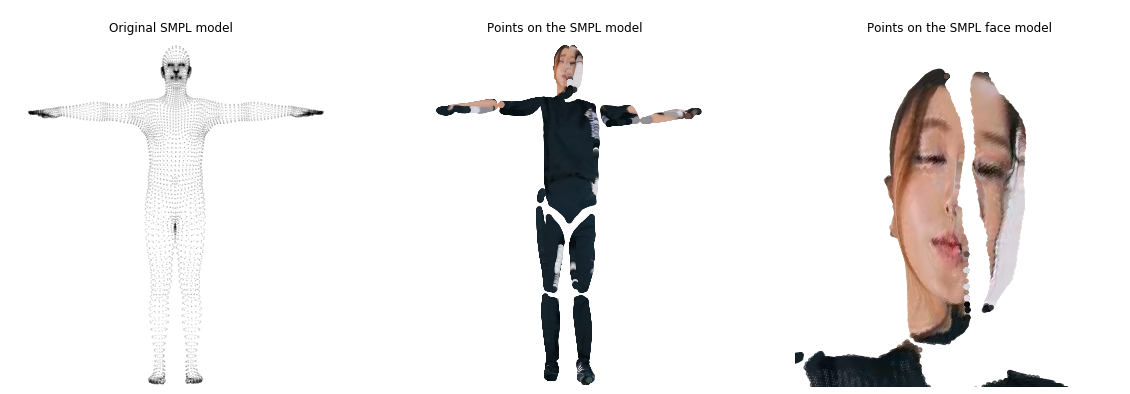

In [22]:
# Now read the smpl model.
with open('/content/drive/My Drive/smpl2/models/basicmodel_m_lbs_10_207_0_v1.0.0.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    data = p

    Vertices = data['v_template']  ##  Loaded vertices of size (6890, 3)
    X,Y,Z = [Vertices[:,0], Vertices[:,1],Vertices[:,2]]


def smpl_view_set_axis_full_body(ax, azimuth=0):
    ## Manually set axis
    ax.view_init(0, azimuth)
    max_range = 0.55
    ax.set_xlim(- max_range, max_range)
    ax.set_ylim(- max_range, max_range)
    ax.set_zlim(-0.2 - max_range, -0.2 + max_range)
    ax.axis('off')


def smpl_view_set_axis_face(ax, azimuth=0):
    ## Manually set axis
    ax.view_init(0, azimuth)
    max_range = 0.1
    ax.set_xlim(- max_range, max_range)
    ax.set_ylim(- max_range, max_range)
    ax.set_zlim(0.45 - max_range, 0.45 + max_range)
    ax.axis('off')

# Color of each (U,V) point.
C = np.where(INDS >= pick_idx)
# C[0] is x-coords  np.array([23,  23,   24, ..])
# C[1] is y-coords  np.array([127, 128, 130, ..])
print('num pts on picked person:', C[0].shape)
person_color = crop_img[C[0], C[1], ::-1]  # boolean indexing.   ::-1 to make the RGB/BGR convention suitable for plotting.
print('person color shape:', person_color.shape)

fig = plt.figure(figsize=[20,7])

## Visualize the full body smpl male template model and collected points
ax = fig.add_subplot(131, projection='3d')
ax.scatter(Z,X,Y,s=0.02,c='k')
smpl_view_set_axis_full_body(ax)
plt.title('Original SMPL model')

## Visualize the full body smpl male template model and collected points
ax = fig.add_subplot(132, projection='3d')
# ax.scatter(Z,X,Y,s=0.02,c='k')
ax.scatter(collected_z,  collected_x, collected_y,  c= person_color/255.0   )  #s=__ size
smpl_view_set_axis_full_body(ax)
plt.title('Points on the SMPL model')

## Now zoom into the face.
ax = fig.add_subplot(133, projection='3d')
# ax.scatter(Z,X,Y,s=0.2,c='k')
ax.scatter(collected_z,  collected_x, collected_y,c=person_color/255.0) #s=__ size
smpl_view_set_axis_face(ax)
plt.title('Points on the SMPL face model')
#
plt.show()
